In [1]:
import numpy as np 
import pandas as pd 
import math

In [2]:
df=pd.read_csv('gbm-data.csv')


In [3]:
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(3751, 1777)

In [5]:
y=df['Activity'].values
X=df.iloc[:,1:].values

In [6]:
X

array([[ 0.        ,  0.49700901,  0.1       , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.36666667,  0.60629148,  0.05      , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.0333    ,  0.48012427,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.2       ,  0.52056377,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1       ,  0.7656462 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.13333333,  0.53395198,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import log_loss
X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.8,random_state=241)

In [8]:
score_train=[]
score_test=[]
for i in [1, 0.5, 0.3, 0.2, 0.1]:
    gbr =GradientBoostingClassifier(n_estimators=250, learning_rate=i, verbose=True, random_state=241)
    gbr=gbr.fit(X_train, y_train)
    test_score=[]
    train_score=[]
    for i, pred in enumerate(gbr.staged_decision_function(X_test)):    
        test_score.append(log_loss(y_test, 1 / (1 + np.exp(-pred))))
    score_test.append(test_score)
    for i, pred in enumerate(gbr.staged_decision_function(X_train)):    
        train_score.append(log_loss(y_train, 1 / (1 + np.exp(-pred))))
    score_train.append(train_score)

      Iter       Train Loss   Remaining Time 
         1           1.0190           12.98s
         2           0.9192           12.09s
         3           0.8272           10.39s
         4           0.7834            9.27s
         5           0.7109            8.93s
         6           0.6368            9.35s
         7           0.5797            9.21s
         8           0.5610            8.68s
         9           0.5185            8.50s
        10           0.4984            8.17s
        20           0.1999            7.76s
        30           0.1313            6.98s
        40           0.0790            6.62s
        50           0.0511            6.24s
        60           0.0352            5.92s
        70           0.0245            5.52s
        80           0.0162            5.23s
        90           0.0114            4.89s
       100           0.0077            4.61s
       200           0.0004            1.34s
      Iter       Train Loss   Remaining Time 
        

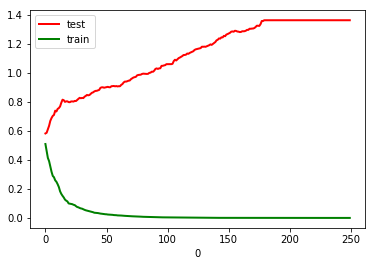

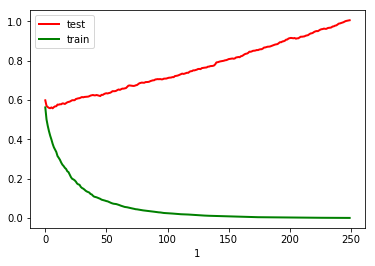

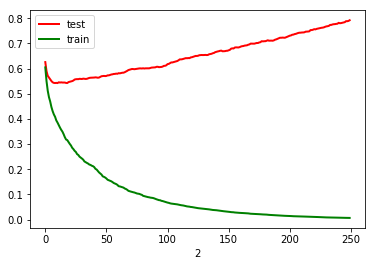

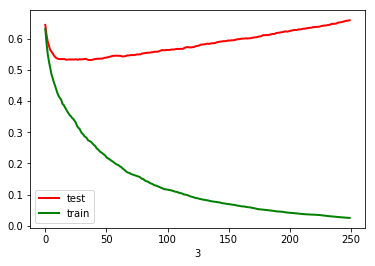

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(4):
    plt.figure()
    plt.plot(score_test[i], 'r', linewidth=2)
    plt.plot(score_train[i], 'g', linewidth=2)
    plt.xlabel(i)
    plt.legend(['test', 'train'])
    plt.show()

In [10]:
print(min(score_test[3]), score_test[3].index(min(score_test[3])))

0.531450796319 36


In [11]:
gbr_randfor=RandomForestClassifier(n_estimators=37, random_state=241)
gbr_randfor.fit(X_train, y_train)
gbr_randfor.predict_proba(X_test)

array([[ 0.2972973 ,  0.7027027 ],
       [ 0.78378378,  0.21621622],
       [ 0.59459459,  0.40540541],
       ..., 
       [ 0.62162162,  0.37837838],
       [ 0.67567568,  0.32432432],
       [ 0.27027027,  0.72972973]])

In [12]:
log_loss(y_test, gbr_randfor.predict_proba(X_test))

0.54091190993698968

In [13]:
gbr_randfor=RandomForestClassifier(n_estimators=150, random_state=241)
gbr_randfor.fit(X_train, y_train)
log_loss(y_test, gbr_randfor.predict_proba(X_test))

0.52671899891359675